<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pretrained Models

#Keras

In [1]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

from keras.preprocessing.image import load_img, img_to_array

import numpy as np

In [2]:
vgg_model = VGG16(weights="imagenet")

553467096/553467096 [==============================] - 25s 0us/step


In [3]:
!wget "https://base-prod.rspb-prod.magnolia-platform.com/dam/jcr:50a0ca53-0f2f-4022-aabf-616d0224e8fd/jay_1200x675.jpg"
!mv "jay_1200x675.jpg" "img_jay.jpg"

! wget "https://cdn.download.ams.birds.cornell.edu/api/v1/asset/311377551/1800"
!mv "1800" "img_bulbul.jpg"

--2024-03-07 03:09:36--  https://base-prod.rspb-prod.magnolia-platform.com/dam/jcr:50a0ca53-0f2f-4022-aabf-616d0224e8fd/jay_1200x675.jpg
Resolving base-prod.rspb-prod.magnolia-platform.com (base-prod.rspb-prod.magnolia-platform.com)... 151.101.2.132, 151.101.66.132, 151.101.130.132, ...
Connecting to base-prod.rspb-prod.magnolia-platform.com (base-prod.rspb-prod.magnolia-platform.com)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 313664 (306K) [image/jpeg]
Saving to: ‘jay_1200x675.jpg’

jay_1200x675.jpg    100%[===================>] 306.31K  --.-KB/s    in 0.004s  

2024-03-07 03:09:37 (73.5 MB/s) - ‘jay_1200x675.jpg’ saved [313664/313664]

--2024-03-07 03:09:38--  https://cdn.download.ams.birds.cornell.edu/api/v1/asset/311377551/1800
Resolving cdn.download.ams.birds.cornell.edu (cdn.download.ams.birds.cornell.edu)... 13.33.88.82, 13.33.88.106, 13.33.88.99, ...
Connecting to cdn.download.ams.birds.cornell.edu (cdn.download.ams.birds.cornell.edu

In [4]:

path_img = "img_jay.jpg"
my_img = load_img(path_img, target_size=[224, 224, 3])
my_img = img_to_array(my_img)
my_img = np.expand_dims(my_img, axis=0)

my_img = preprocess_input(my_img)

pred = vgg_model.predict(my_img)
decode_predictions(pred)

35363/35363 [==============================] - 0s 1us/step


[[('n01580077', 'jay', 0.38157436),
  ('n01807496', 'partridge', 0.35555145),
  ('n01797886', 'ruffed_grouse', 0.14121296),
  ('n01806567', 'quail', 0.034730833),
  ('n02025239', 'ruddy_turnstone', 0.011067375)]]

In [5]:
path_img = "img_bulbul.jpg"
my_img = load_img(path_img, target_size=[224, 224, 3])
my_img = img_to_array(my_img)
my_img = np.expand_dims(my_img, axis=0)

my_img = preprocess_input(my_img)

pred = vgg_model.predict(my_img)
decode_predictions(pred)

1/1 [==============================] - 0s 19ms/step


[[('n01560419', 'bulbul', 1.0),
  ('n01833805', 'hummingbird', 2.3019588e-09),
  ('n01534433', 'junco', 9.627414e-10),
  ('n01580077', 'jay', 9.026386e-10),
  ('n01582220', 'magpie', 1.7765739e-10)]]

In [6]:
path_img = ["img_bulbul.jpg", "img_jay.jpg"]

for img in path_img:
  my_img = load_img(img, target_size=[224, 224, 3])
  my_img = img_to_array(my_img)
  my_img = np.expand_dims(my_img, axis=0)

  my_img = preprocess_input(my_img)

  pred = vgg_model.predict(my_img)

  for i in range(5):
    print(decode_predictions(pred, top=5)[0][i][1])

1/1 [==============================] - 0s 18ms/step
bulbul
hummingbird
junco
jay
magpie
1/1 [==============================] - 0s 20ms/step
jay
partridge
ruffed_grouse
quail
ruddy_turnstone


#PyTorch

In [7]:
import torch
from torchvision import transforms
from torchvision.models import vgg16
from PIL import Image

In [8]:
torch_vgg_model = vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 133MB/s]


In [9]:
# feedforward
torch_vgg_model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [10]:
preprocess = transforms.Compose([transforms.Resize(256),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])])

In [11]:
img = Image.open(path_img[1])
img = preprocess(img)
batch_img = torch.unsqueeze(img, 0)

with torch.no_grad():
  pred = torch_vgg_model(batch_img)
  _, indices = torch.sort(pred, descending=True)
  print(indices[0][:5])


tensor([ 92, 133, 139,  86, 138])


In [12]:
import json
from urllib import request

# Download the imagenet class index
url = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
imagenet_classes = json.loads(request.urlopen(url).read().decode())

# Assuming "indices" is a tensor of predicted class indices
for idx in indices[0][:5]:
  class_id = str(idx.item())
  print(imagenet_classes[class_id][1])

bee_eater
bittern
ruddy_turnstone
partridge
bustard


##ResNet

In [13]:
from torchvision.models import resnet50, ResNet50_Weights

# Old weights with accuracy 76.130%
RN50v1 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# New weights with accuracy 80.858%
RN50v2 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

# Best available weights (currently alias for IMAGENET1K_V2)
# Note that these weights may change across versions
RN50vd = resnet50(weights=ResNet50_Weights.DEFAULT)

# # Strings are also supported
# resnet50(weights="IMAGENET1K_V2")

# No weights - random initialization
RN50None = resnet50(weights=None)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 159MB/s]
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 114MB/s] 


In [14]:
from torchvision.io import read_image
from torchvision.models.quantization import resnet50, ResNet50_QuantizedWeights

# Step 1: Initialize model with the best available weights
img = read_image(path_img[1])
weights = ResNet50_QuantizedWeights.DEFAULT
model = resnet50(weights=weights, quantize=True)
# feed-forward
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score}%\n")

Downloading: "https://download.pytorch.org/models/quantized/resnet50_fbgemm-23753f79.pth" to /root/.cache/torch/hub/checkpoints/resnet50_fbgemm-23753f79.pth
100%|██████████| 25.0M/25.0M [00:00<00:00, 175MB/s]
/usr/local/lib/python3.10/dist-packages/torch/_utils.py:376: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  device=storage.device,


jay: 25.96423625946045%



/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


#MobileNet

In [15]:
# import packages
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

In [16]:
MNv2 = MobileNetV2(weights="imagenet")

14536120/14536120 [==============================] - 2s 0us/step


In [18]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


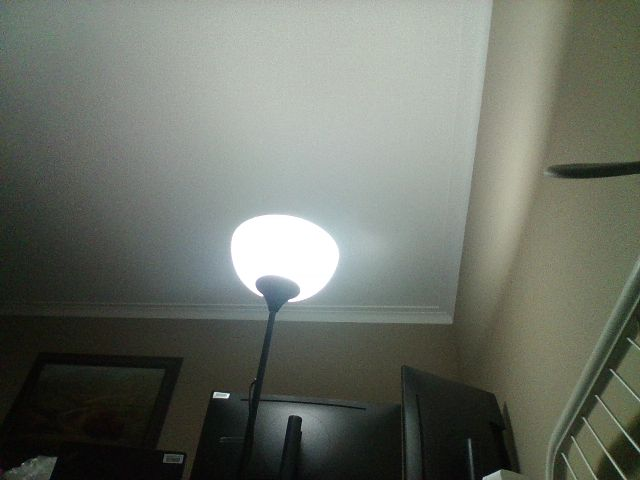

In [19]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

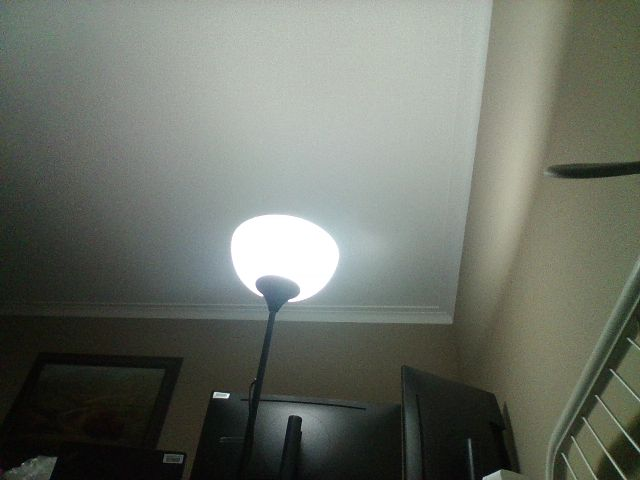

In [23]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread("photo.jpg", cv2.IMREAD_UNCHANGED)
cv2_imshow(img)


In [24]:
img = cv2.resize(img, (224, 224))
print("after converting to an array:", type(img), "shape =", img.shape)

img = np.expand_dims(img, axis=0)
print("\nshape =", img.shape)

img = preprocess_input(img)
pred = MNv2.predict(img)
decode_predictions(pred, top=5)

after converting to an array: <class 'numpy.ndarray'> shape = (224, 224, 3)

shape = (1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step


[[('n04380533', 'table_lamp', 0.34902272),
  ('n03637318', 'lampshade', 0.26185292),
  ('n03529860', 'home_theater', 0.027802072),
  ('n04553703', 'washbasin', 0.027745362),
  ('n04590129', 'window_shade', 0.020047093)]]